# Campaign, Deployments, Events objects - demo

`pynsitu.events` implements a range of objects that are useful for the analysis of in situ experiments. From high to low levels:

- `Campaign`: this object holds data describing an in situ campaign. Data is typically stored in a yaml file.
It is composed of `Deployments` objects, `Platforms` information and relevant meta data.
- `Platform`: A platform object contains `Deployments`, `Sensors` and meta data
- `Deployments`: collection of `Deployments`
- `Deployment`: single deployment with temporal and geographical start/end information and meta data.
- `Event`: An event is an atom used to describe deployments. It contains four elementary information: label, longitude, latitude, time.

In [1]:
import pynsitu as pin

---

## Campaign


Start from high level and go down


In [2]:
cp = pin.Campaign("../pynsitu/tests/campaign.yaml")
cp

cognac.insitu.events.campaign(drixmed22 2022/09/21 to 2022/09/25)

Iterating over cp mixes Deployments and Platforms:

In [3]:
for i in cp:
    print(i, type(cp[i]))

underway <class 'pynsitu.events.Deployment'>
tide_gauge <class 'pynsitu.events.Platform'>
europe <class 'pynsitu.events.Platform'>
drix <class 'pynsitu.events.Platform'>
drifter0 <class 'pynsitu.events.Platform'>
drifter1 <class 'pynsitu.events.Platform'>
drifter2 <class 'pynsitu.events.Platform'>
drifter3 <class 'pynsitu.events.Platform'>
drifter4 <class 'pynsitu.events.Platform'>
drifter5 <class 'pynsitu.events.Platform'>


Iterating over all deployments is performed with:

In [4]:
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    print(label, platform, sensor, deployment)

underway None None underway / start 2022-09-21 06:30:00 / end 2022-09-25 15:10:00
laseyne tide_gauge None laseyne / start 2022-09-20 17:48:30 5.89 43.11 / end 2022-09-21 04:50:00 5.89 43.11
fos0 tide_gauge None fos0 / start 2022-09-23 19:35:45 4.89 43.39 / end 2022-09-24 11:59:00 4.89 43.39
fos1 tide_gauge None fos1 / start 2022-09-24 13:24:30 4.90 43.38 / end 2022-09-24 15:16:00 4.90 43.38
calibration_ligne1 europe adcp calibration_ligne1 / start 2022-09-21 08:09:30 / end 2022-09-21 08:31:00
calibration_ligne2 europe adcp calibration_ligne2 / start 2022-09-21 08:32:44 / end 2022-09-21 08:52:00
calibration_ligne3 europe adcp calibration_ligne3 / start 2022-09-21 08:52:35 / end 2022-09-21 09:10:00
calibration_ligne4 europe adcp calibration_ligne4 / start 2022-09-21 09:10:23 / end 2022-09-21 09:26:00
d0 europe adcp d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00
d1 europe adcp d1 / start 2022-09-22 20:57:22 / end 2022-09-23 14:16:20
d2 europe adcp d2 / start 2022-09-23 15:54:46 

Select a single Deployment:

In [5]:
cp["underway"]

cognac.insitu.events.deployment(underway / start 2022-09-21 06:30:00 / end 2022-09-25 15:10:00)

Select a single platform:

In [6]:
cp["europe"]

{'meta': {'color': 'navy'}, 'deployments': cognac.insitu.events.deployments(europe
), 'sensors': {'adcp': cognac.insitu.events.deployments(adcp
calibration_ligne1
calibration_ligne2
calibration_ligne3
calibration_ligne4
d0
d1
d2
d3), 'ctd': cognac.insitu.events.deployments(ctd
s0_1
s0_2
s0_3
s0_4
s0_5
s0_7
s0_8
s0_9
s0_10
s0_11
s0_12
s0_13
s0_14
s0_15
s0_16
s0_17
s0_18
s1_1
s1_2
s1_3
s1_4
s1_5
s1_6
s1_7
s1_8
s1_9
s1_10
s1_11
s1_12
s1_13
s1_14)}}

Select a single sensor and a sensor deployment:

In [7]:
cp["europe"]["adcp"]

cognac.insitu.events.deployments(adcp
calibration_ligne1
calibration_ligne2
calibration_ligne3
calibration_ligne4
d0
d1
d2
d3)

In [8]:
cp["europe"]["adcp"]["d0"]

cognac.insitu.events.deployment(d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00)

### show campaign timeline

<AxesSubplot: title={'center': 'drixmed22'}>

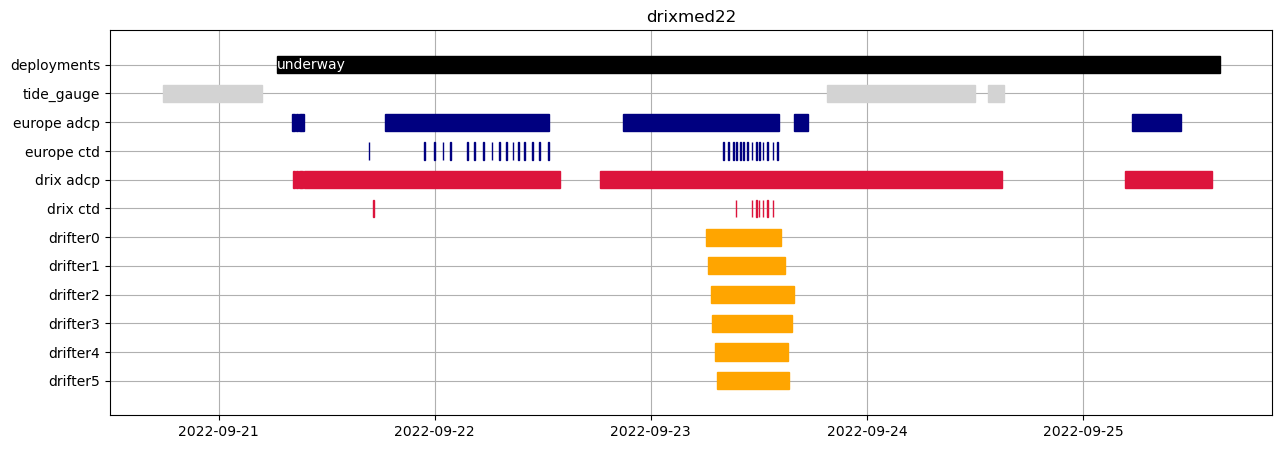

In [9]:
cp.timeline()

---
## make maps


### with cartopy

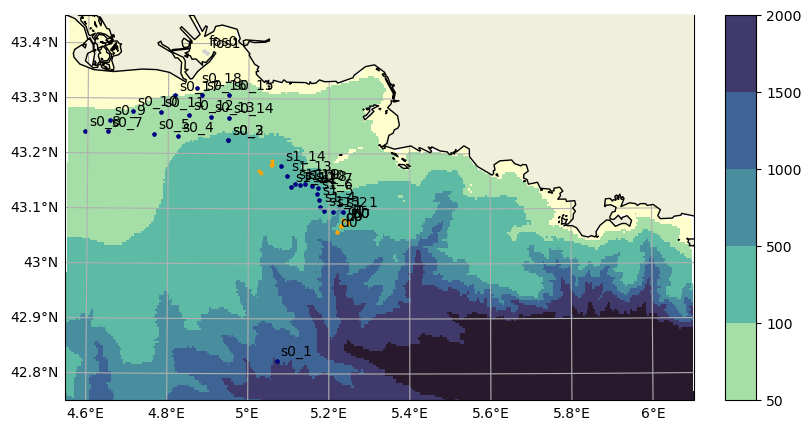

In [10]:
fac = cp.map(coastline="h")
ax = fac["ax"]

# add all deployments 
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    if "color" in meta:
        c = meta["color"] if "color" in meta else "0.5"
    deployment.plot_on_map(ax, color=c, label=True, label_xyshift=(.01,.01))

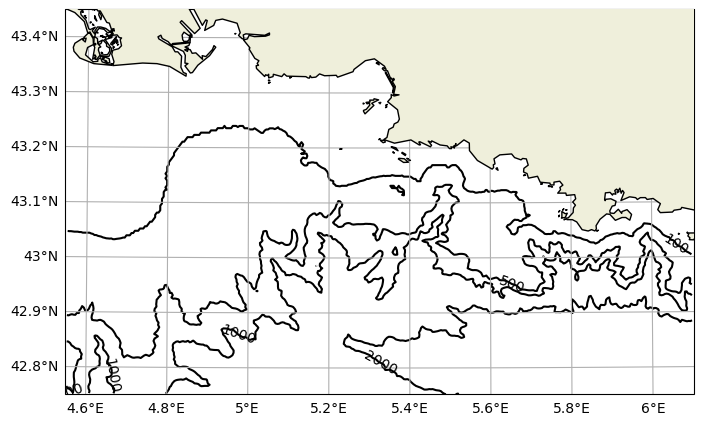

In [11]:
fac = cp.map(coastline="h", bathy_levels=[0, 100, 500, 1000, 2000])

### with folium

In [12]:
cp.map_folium()